## Overview

In this file, there are two different optimization techniques for determining the weights of a portfolio. One technique is one I created and the other is using a library that uses the efficient frontier to find the weights.

The first is using a method that I created using the "scipy.optimize" library. I obtained the relevant data from Yahoo Finance, cleaned and organized into the correct format, defined the objective function, found all of the parameters from the data, and then optimized. From the weights, I then found the sharpe ratio of the portfolio.

The second uses "pypfopt.efficient_frontier", which includes a built-in function to determine the optimal weights that give you the portfolio with the highest sharpe ratio. This works great and is how the optimization will be performed in this project.

The two techniques are very similar, but there are some subtle differences. Here are some of the differences:
- For the first one, it does not exactly find the result with the highest sharpe ratio. This is because you have to define a risk level factor, which I set to 1. This can also be thought of as a required return as this impacts the overall portfolio return.
- Since the first technique is the one I created, it is able to be customized more than the efficient frontier technique. I would be able to more easily add a value-at-risk measure, use a risk parity approach, implement nested clustered optimization, use the Black Litterman model, etc. with the first approach.

For the purposes of this assignment, we are going to continue with the second technique. This method is exactly what we are looking for as it allows us to easily implement the Markowitz approach and perform the necessary analysis on it. It will allow us to choose the most optimal portfolio that has the highest mean relative to the variance.

### Now to discuss the theory:
After performing significant research about Markowitz optimization, I have learned a lot about how it works and potential issues. The Markowitz Approach optimized a model by choosing the weights that have the highest sharpe ratio. There are many different modifications such as shorting stocks and taking into account transaction costs, as well as optimizing solely to minimize risk.

The model was created in 1952 and won the Nobel Prize for Economics in 1990. It has been used widespread in the financial optimization and portfolio construction world. The model provides a quantitative and logically sound way to construct portfolios. It has many applications and modifications. It works by figuring out the risk factor, which is the variance of the portfolio, as well as the estimated portfolio return for each security that is being considered. The optimization will evaluate the different possible portfolio allocations and choose the one with the highest return relative to its risk, in other words, it will choose the one with the highest sharpe ratio. The other conditions are that the sum of the portfolio weights has to be 1 and that each weight is between 0 and 1 (which I narrowed to 0 and 0.5), although it is possible to have an allocation less than 0 to take into account shortselling. It is incredbily important to have the correct data in the right format as the model outputs are only as good as the inputs.

The model appears to be simple, but under the hood, figuring out the correct risk measure and combining that to maximize the sharpe ratio gets very confusing. This is a quadratic optimization problem, which can be very difficult to solve even with the correct software. There are different tricks by introducing auxilliary variables in the model, but in the model that I created, I made a slightly simpler approach due to the complexity of the model. The model I made still maximizes return relative to risk, but it uses a predefined risk aversion level, so based on your opinions the model may vary very slightly. Overall, the model does have a relatively high sharpe ratio, it is just not necessarily the highest possible value. The second model does find the highest possible sharpe ratio value, which is why we decided to use that in this project.

### My Progress
Throughout this project, I spent a significant amount of time doing research about the model before I actually dived into the actual implementation. It was incredibly important to understand the theory so that I thoroughly understood what I was doing. I read through various publications and also spoke to professionals in the field for advice. There were many different websites, articles, journals, textbooks, etc. that I read through that mentioned portfolio construction. I even spoke with Reha Tutuncu, who is on the Industry Advisory Council and is very experienced with portfolio construction (he even wrote the textbook the we are using the the financial optimization class). He recommended some great resources and provided great advice.

After obtaining a significant knowledge about the Markowitz model and its potential modifications, I constructed my own model in Python. I understood the theory, so that was now the difficult aspect, but it took a significant amount of time to figure out how to construct the model in Python. There were specific aspects in Python that I had to adopt to that I was not expecting, such as only being able to minimize an optimization problem, understanding how to optimize using the "scipy.optimize" library, and having the data in the right format while using the correct Python syntax. After I figured all of this out, I was able to easily construct the optimization model.

The way I created the model, it works for any given stock, and all you have to do is indicate which securities you want to include in the code below as well as the start and end dates for the portfolio construction. The code works for any number stocks as long as they have stock price data for the entirety of the dates indicated. The model will also determine the portfolio returns based on the optimal weights and will give you the sharpe ratio as well.

Through my various research, I have also learned not to make the common mistakes, such as having a misalignment between the return and risk models. The return and risk models need to use the same data in the same time period or else the model will be off. In addition, when using the model to rebalance, it is important to check the outputs and make sure the optimal weights have not changes too much as that could lead to large transaction costs. Making sure the portfolio is reasonable is very important.

After constructing my own model, we wanted to take it one step further to make sure that the maximum sharpe ratio is used. We discovered the package "pypfopt.efficient_frontier", which has a built-in function to find the maximum sharpe ratio. You do not need to worry about having the optimization in the right form as this will do the optimization for you.

Using this second model, the optimal portfolio weights are determined for the different predicted values. The model has three stocks, which are AAPL, COKE, and GOOGL. There are three different predictions used, and we determine the portfolio returns based on the optimal weights to maximiuze the sharpe ratio, and we compare each one with the actual returns so we can check to see how each one works.

We can also graph the different models compared to the actual results, as we are also backtesting with historical data. We can see which predictions are best and use those when we optimize in the future for other portfolios.

### Moving Forward
There are some potential issues with the model, which are potential areas to improve upon.
- The model works best if the securities are not correlated, but this is rarely the case in practice. Most stock prices move together, and this will shift the model towards choosing a higher allocation of those assets as it would results in lower variance, which is the risk measure.
    - Nested Clustered Optimzation aims to minimize this risk by first separating the securities into clusters. The model will choose an allocation among the each cluster, and then it will provide allocations within each security within each cluster. This way, it will more efficiently allocate among different industries.
- The model does not differentiate among the different distributions of the returns. Let us consider one stock that has returns that are skewed to the left meaning that it is possible for very large negative returns and another stock has returns that are skewed to the right meaning that it is possible for very large positive returns. We would prefer the stock that does not have the negative returns as most investors are risk averse. However, if these two stocks have returns that are otherwise the same, then the model would not differentiate between the two.
    - This can be taken into account by adding a value-at-risk (VaR) measure or a conditional value-at-risk (CVaR) measure. These will figure out a cutoff for the returns and will only take into account those returns that are above the cutoff. The model will then be able to more appropriately choose among the returns and choose the stock that has a higher cutoff, meaning it will choose the stock with the returns that are more positive.
- The model is uses entirely quantitative ideology based on the numerical returns. These values can be hard to predict, and in this case it is not an issue as there was a very large component dedicated towards estimating the returns. However, it would be nice to be able to take into account your own personal views on each stock. It would add a qualitative component to the model.
    - This is accomplished by implementing a Black-Litterman Model. This is a different model than the Markowitz Model, but it would be interesting to compare results and see how the sharpe ratio differs.

In this project, I chose to keep the Markowitz Model simple when finding the optimal weights. As I was performing research, I had many different directions to take the model and I was excited to be able to add a value-at-risk measure to improve on the model. When I got to the actual implementation, I realized how difficult it actually is to construct the model. I was able to make the basic model, and once I figured out the correct syntax it was not that difficult. However, adding a value-at-risk measure or implementing nested clustered optimization are very complicated techniques that require a very extensive knowledge of not only the theory, but also knowledge of Python as it relates to optimization. There is also a machine learning aspect, and overall, it exceeded what I was able to create. I was planning on performing these extra steps, but I  realized that I did not necessarily have the knowledge required to do so, as I would need to strong understanding of machine learning, among other things, as well. The most difficult part is the implementation in Python as I do believe I understand each of these modifications in theory, but I ran into much difficulty when it came to the implementation.

If anyone works on this project further, which I hope is the case, I would recommend them to explore these ideas. I already have the basic Markowitz Model created, but if someone has the additional knowledge to tackle these modifications, that would help expand on the project. Having taking ISE 447:Financial Optimization would be very helpful for the project.

Now we can get to the actual code for the optimization.

## First Technique- My Own Model

The model below is the one that I created. It uses "scipy.optimize" and defines its own objective function and performs its own optimization. It can be customized to include any number of stocks and for any time period. More details are below for anything to change.

In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#from scipy.stats import norm
#from scipy.stats import linregress
#import statsmodels.formula.api as smf
import csv
import scipy.optimize as opt
import pandas_datareader as pdr
from datetime import datetime

In [2]:
# function to read in data from a csv
def readPricesCSV(file):
    df = pd.read_csv(file)
    dfPrices = df["Adj Close"]
    return dfPrices

In [3]:
# function to read in stock prices from yahoo finance
def readPricesYF(start_date, end_date, tickers):
    stockPrices = pdr.get_data_yahoo(tickers, start=start_date, end=end_date)   # read in the data
    stockPrices = stockPrices.filter(like='Adj Close')   # tickers are columns and data values are adjusted closing prices with the date as the index
    stockPrices.columns = tickers   # change column names to be their tickers
    stockPrices = stockPrices.stack().swaplevel().sort_index().reset_index()    # make the data tall and clean it up so it is easier to perform analysis on
    stockPrices.columns = ['Firm','Date','Adj Close']     # rename the columns
#    stockPrices['Return'] = stockPrices.groupby('Firm')['Adj Close'].pct_change()    # get the daily returns for each ticker
    return stockPrices


In [4]:
# the objective function
def obj(weights):
    
    sum_return = np.dot(weights,means)     #get the return measure given by the weights and mean
    num_stocks = len(means)
    
    #get the risk measure given by the weights
    risk_measure = np.matmul(np.matmul(np.transpose(np.array(weights)), cov_matr), np.array(weights))
    
    #return the objective function value
    return  -(sum_return - (risk_level * risk_measure))


### What To Change:
**The following block of code is the only one in this file that should be changed.**
- Add more stocks by including them in the list of tickers
- Change the starting and ending dates

**If there are any changes made, rerun the entire code after making the changes**

**Nothing else should be changed in this file**

In [5]:
#choose which stocks to include in the optimization of the portfolio (list the tickers)
tickers = ['MSFT', 'AAPL', 'AMZN', 'NFLX', 'DIS', 'TSLA']
tickers = sorted(tickers)

#set the start and end dates- choose last six months in this case
start_date = datetime(2020, 8, 25) #year, month, day
end_date = datetime(2021,2,25) #year, month, day

stockPrices = readPricesYF(start_date, end_date, tickers)    # use the function defined above to get data from Yahoo Finance
#stockPrices['ret'] = stockPrices['Adj Close'].pct_change()
stockPrices

,Firm,Date,Adj Close
0,AAPL,2020-08-25,124.213104
1,AAPL,2020-08-26,125.902283
2,AAPL,2020-08-27,124.397202
3,AAPL,2020-08-28,124.195694
4,AAPL,2020-08-31,128.407440
...,...,...,...
757,TSLA,2021-02-19,781.299988
758,TSLA,2021-02-22,714.500000
759,TSLA,2021-02-23,698.840027
760,TSLA,2021-02-24,742.020020


In [6]:
# reformat the data
stock_prices_format = stockPrices.set_index(['Date', 'Firm']).unstack()   # change format so that date and each company are columns
stock_prices_format.columns = tickers
stock_prices_pct_change = stock_prices_format.pct_change()[1:]
stock_prices_pct_change

,AAPL,AMZN,DIS,MSFT,NFLX,TSLA
Date,,,,,,
2020-08-26,0.013599,0.028496,0.018414,0.021620,0.116087,0.064166
2020-08-27,-0.011954,-0.012159,0.011726,0.024554,-0.038829,0.039746
2020-08-28,-0.001620,0.000529,0.013535,0.010283,-0.004522,-0.011323
2020-08-31,0.033912,0.014451,-0.027077,-0.014766,0.010823,0.125689
2020-09-01,0.039833,0.013956,0.012740,0.007715,0.050967,-0.046697
...,...,...,...,...,...,...
2021-02-19,0.001234,-0.023535,0.003552,-0.011567,-0.014593,-0.007722
2021-02-22,-0.029799,-0.021281,0.044160,-0.026808,-0.011921,-0.085499
2021-02-23,-0.001111,0.004326,0.027795,-0.005288,0.023174,-0.021917


In [7]:
# get the different number of stocks and the number of stock prices 
num_stocks = len(tickers)   # the number of stocks
prices_per_stock = stock_prices_format.shape[0]   # the number of stock prices

In [8]:
# get the covariance matrix
cov_matr = np.cov(np.array(stock_prices_pct_change.iloc[:,range(0,num_stocks)].T))   # get the columns and transpose it so it is in right format, then turn it into covariance matrix
#corr_matr = stock_prices_pct_change.corr()
cov_matr

array([[ 5.59896290e-04,  3.73559102e-04,  4.32429540e-05,
         3.05618601e-04,  3.38402256e-04,  5.54343292e-04],
       [ 3.73559102e-04,  4.41159509e-04,  5.04481211e-05,
         3.06976679e-04,  3.98375581e-04,  4.11422252e-04],
       [ 4.32429540e-05,  5.04481211e-05,  5.77167770e-04,
         8.61969935e-05,  1.64317959e-05, -3.94774403e-05],
       [ 3.05618601e-04,  3.06976679e-04,  8.61969935e-05,
         3.32178259e-04,  2.66808739e-04,  3.76651700e-04],
       [ 3.38402256e-04,  3.98375581e-04,  1.64317959e-05,
         2.66808739e-04,  9.12232700e-04,  4.15956589e-04],
       [ 5.54343292e-04,  4.11422252e-04, -3.94774403e-05,
         3.76651700e-04,  4.15956589e-04,  2.22980118e-03]])

In [9]:
# get the mean price for each stock

means = np.array(stock_prices_pct_change.mean().to_list())    # get means for each column, convert to a list, convert to a numpy array
means

array([ 5.71133153e-05, -4.98897312e-04,  3.34623847e-03,  6.51091710e-04,
        1.30126183e-03,  5.28170546e-03])

In [10]:
# set the risk level
risk_level = 1   # risk loving < 0; risk neutral = 0; risk averse > 0

In [11]:
# set an intial value for the weights
weights = np.array([1/num_stocks]*num_stocks) # set an initial value for the weights, which is an even composition

### At this point, we have the following information:
 - **"tickers"** is a list of the tickers, and it is in alphabetical order
 - **"num_stocks"** is the number of different stocks
 - **"prices_per_stock"** is the different number of observations/the different number of stock prices obtained

For the Optimization:
 - **"cov_matr"** is the covariance matrix
 - **"means"** is a numpy array that consists of the means of each stock price during the time frame **(in alphabetical order of the tickers)**
 - **"risk_level"** is the risk level
 - **"weights"** is a numpy array that consists of the initial value for the weights, which is just an even composition and will be changed later **(in alphabetical order of the tickers)**

In [12]:
# perform the optimization!
lin_constr = opt.LinearConstraint([1]*num_stocks, [1], [1])    # sum of all values are greater than or equal to 1 and less than or equal to 1, so the sum has to be equal to 1
bounds = opt.Bounds([0]*num_stocks, [0.5]*num_stocks)     # each portfolio weight is greater than 0 and less than 0.5
result = opt.minimize(obj, x0=[1/num_stocks]*num_stocks, method="trust-constr", constraints = lin_constr, bounds=bounds)    # actually perform the optimization


optimal_weights = pd.DataFrame({'stock': tickers, 'weights': result.x.tolist()})
optimal_weights
#sum(optimal_weights['weights'])
np.dot(optimal_weights["weights"],means) - (np.matmul(np.matmul(np.transpose(np.array(optimal_weights["weights"])), cov_matr), np.array(optimal_weights["weights"])))

print(-1*result.fun) 
optimal_weights
#print(result.x) 

0.0035937398363597435


,stock,weights
0,AAPL,0.002650
1,AMZN,0.002229
2,DIS,0.491988
3,MSFT,0.003388
4,NFLX,0.005351
5,TSLA,0.494393


In [13]:
opt_wghts = np.array(optimal_weights.set_index('stock')).flatten()

weighted_rets = opt_wghts * stock_prices_pct_change
weighted_rets

port_rets = weighted_rets.sum(axis=1)#axis =1 tels pandas to add the rows 
print(port_rets)

mean_ret = port_rets.mean()
std_ret = port_rets.std()
sharpe = mean_ret/std_ret
print("\n\n", sharpe, "  ", mean_ret, "  ", std_ret)


Date
2020-08-26    0.041577
2020-08-27    0.025236
2020-08-28    0.001068
2020-08-31    0.048948
2020-09-01   -0.016383
                ...   
2021-02-19   -0.002237
2021-02-22   -0.020825
2021-02-23    0.002952
2021-02-24    0.031651
2021-02-25   -0.056419
Length: 126, dtype: float64


 0.16455298468054466    0.004265757747744657    0.02592330826466622


Next steps:
- Explore some of the modifications listed above
    - Adding a (Conditional) Value at Risk measure
    - Exploring Nested Clustered Optimization
    - Look into the Black-Litterman Model

## Second Technique- Using "pypfopt.efficient_frontier" built-in function
This second technique uses a built in function to maximize the sharpe ratio. [This is a link to a very helpful resource](https://towardsdatascience.com/automating-portfolio-optimization-using-python-9f344b9380b9#)

#In order to install the necessary packages, you first need to run:
```python
#!pip install PyPortfolioOpt
```
If you receive an error, you need to install C++. This can be done in terminal for Mac users by running:
```
xcode-select --install
```

In [14]:
#only need to run this if you are using this code for the first time and "PyPortfolioOpt" has never been installed before on your machine
#!pip install PyPortfolioOpt #need to install C++ first by doing (xcode-select --install) in terminal 

In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA
from pypfopt import plotting
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter

### First, use the Neural Network returns

In [16]:
ret_NN = pd.read_csv('returns/exp_returns_NN.csv').set_index('Date')
stocks_NN = ret_NN.columns.to_list()
ret_NN

,AAPL_NN,COKE_NN,GOOGL_NN
Date,,,
2019-01,0.060652,-0.000458,0.021834
2019-02,-0.005493,-0.002889,-0.036394
2019-03,0.082441,-0.055919,0.041015
2019-04,-0.007477,-0.093085,-0.038141
2019-05,0.044749,-0.172228,0.007834
2019-06,0.149206,0.059261,0.099788
2019-07,0.107595,0.007572,0.063157
2019-08,0.031272,-0.007347,0.063157
2019-09,0.113121,0.001431,0.063157


In [17]:
#Annualized Return
#exp_rets = expected_returns.mean_historical_return(ret)
#Sample Variance of Portfolio
#cov_matrix = risk_models.sample_cov(ret)

#print(type(exp_rets))
#print(type(cov_matrix))

exp_returns_NN = ret_NN.mean()
#exp_returns_NN = (ret_NN+1).prod()-1   # get annualized mean by adding one to each return, multiplying, then subtracting one for each stock

#Covariance Matrix
cov_matr_NN = np.cov(np.array(ret_NN.iloc[:,range(0,len(stocks_NN))].T))   # get the columns and transpose it so it is in right format, then turn it into covariance matrix
cov_matr_NN = pd.DataFrame(cov_matr_NN,columns=stocks_NN)   # convert to a dataframe


In [18]:
ef_NN = EfficientFrontier(exp_returns_NN, cov_matr_NN, weight_bounds=(0,0.45)) #weight bounds in negative allows shorting of stocks
sharpe_port_NN=ef_NN.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
#sharpe_port
sharpe_weights_NN=ef_NN.clean_weights()
sharpe_weights_NN


OrderedDict([('AAPL_NN', 0.45), ('COKE_NN', 0.1), ('GOOGL_NN', 0.45)])

In [19]:
weighted_returns_NN = sharpe_weights_NN * ret_NN
#weighted_returns
port_ret_NN = weighted_returns_NN.sum(axis=1)#axis =1 tels pandas to add the rows 
port_ret_NN

Date
2019-01    0.037073
2019-02   -0.019138
2019-03    0.049963
2019-04   -0.029837
2019-05    0.006440
2019-06    0.117973
2019-07    0.077596
2019-08    0.041758
2019-09    0.079468
2019-10    0.086138
dtype: float64

In [20]:
mean_ret_NN = port_ret_NN.mean()
std_ret_NN = port_ret_NN.std()
sharpe_NN = mean_ret_NN/std_ret_NN
print("The optimal weights are:", sharpe_weights_NN)
print("The optimal mean return is:", mean_ret_NN)
print("\nThe optimal standard deviation of the returns is:", std_ret_NN)
print("\nThe maximum sharpe ratio is:", sharpe_NN)


The optimal weights are: OrderedDict([('AAPL_NN', 0.45), ('COKE_NN', 0.1), ('GOOGL_NN', 0.45)])
The optimal mean return is: 0.04474348

The optimal standard deviation of the returns is: 0.04780333837257487

The maximum sharpe ratio is: 0.935990696952447


### Second, use the Functional Form returns

In [21]:
ret_FF = pd.read_csv('returns/exp_returns_FF.csv').set_index('Date')
stocks_FF = ret_FF.columns.to_list()
ret_FF

,AAPL_FF,COKE_FF,GOOGL_FF
Date,,,
2019-01,0.118725,0.062926,0.108028
2019-02,0.058304,0.006292,0.065197
2019-03,0.073873,-0.021219,0.072216
2019-04,0.061748,-0.086411,0.125285
2019-05,-0.196038,0.021094,-0.018166
2019-06,0.090399,0.007694,0.024276
2019-07,0.025279,0.010908,0.005439
2019-08,-0.037081,0.096283,0.004448
2019-09,0.047141,-0.054500,0.019642


In [22]:
#Annualized Return
exp_returns_FF = ret_FF.mean()
#exp_returns_FF = (ret_FF+1).prod()-1   # get annualized mean by adding one to each return, multiplying, then subtracting one for each stock

#Covariance Matrix
cov_matr_FF = np.cov(np.array(ret_FF.iloc[:,range(0,len(stocks_FF))].T))   # get the columns and transpose it so it is in right format, then turn it into covariance matrix
cov_matr_FF = pd.DataFrame(cov_matr_FF,columns=stocks_FF)   # convert to a dataframe


In [23]:
ef_FF = EfficientFrontier(exp_returns_FF, cov_matr_FF, weight_bounds=(0,0.45)) #weight bounds in negative allows shorting of stocks
sharpe_port_FF=ef_FF.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
#sharpe_port
sharpe_weights_FF=ef_FF.clean_weights()
sharpe_weights_FF


OrderedDict([('AAPL_FF', 0.27599), ('COKE_FF', 0.27401), ('GOOGL_FF', 0.45)])

In [24]:
weighted_returns_FF = sharpe_weights_FF * ret_FF
#weighted_returns
port_ret_FF = weighted_returns_FF.sum(axis=1)#axis =1 tels pandas to add the rows 
port_ret_FF

Date
2019-01    0.098622
2019-02    0.047154
2019-03    0.047071
2019-04    0.049743
2019-05   -0.056499
2019-06    0.037982
2019-07    0.012413
2019-08    0.018150
2019-09    0.006916
2019-10    0.028347
dtype: float64

In [25]:
mean_ret_FF = port_ret_FF.mean()
std_ret_FF = port_ret_FF.std()
sharpe_FF = mean_ret_FF/std_ret_FF
print("The optimal weights are:", sharpe_weights_FF)
print("\nThe optimal mean return is:", mean_ret_FF)
print("\nThe optimal standard deviation of the returns is:", std_ret_FF)
print("\nThe maximum sharpe ratio is:", sharpe_FF)


The optimal weights are: OrderedDict([('AAPL_FF', 0.27599), ('COKE_FF', 0.27401), ('GOOGL_FF', 0.45)])

The optimal mean return is: 0.028989802583

The optimal standard deviation of the returns is: 0.03972876080780467

The maximum sharpe ratio is: 0.7296930987413276


### Third, use the ".predict()" returns

In [26]:
ret_PRED = pd.read_csv('returns/exp_returns_PRED.csv').set_index('Date')
stocks_PRED = ret_PRED.columns.to_list()
ret_PRED

,AAPL_pred,COKE_pred,GOOGL_pred
Date,,,
2019-01,0.150977,0.047987,0.078169
2019-02,0.100294,0.024013,0.034194
2019-03,0.060720,0.014569,0.033077
2019-04,0.086689,0.017221,0.076161
2019-05,-0.093663,-0.031400,-0.087428
2019-06,0.120442,0.047969,0.068092
2019-07,0.016515,0.008042,0.017801
2019-08,0.013999,-0.008271,-0.006426
2019-09,-0.048274,0.015696,-0.014836


In [27]:
#Annualized Return
exp_returns_PRED = ret_PRED.mean()
#exp_returns_PRED = (ret_PRED+1).prod()-1   # get annualized mean by adding one to each return, multiplying, then subtracting one for each stock

#Covariance Matrix
cov_matr_PRED = np.cov(np.array(ret_PRED.iloc[:,range(0,len(stocks_PRED))].T))   # get the columns and transpose it so it is in right format, then turn it into covariance matrix
cov_matr_PRED = pd.DataFrame(cov_matr_PRED,columns=stocks_PRED)   # convert to a dataframe


In [28]:
ef_PRED = EfficientFrontier(exp_returns_PRED, cov_matr_PRED, weight_bounds=(0,0.45)) #weight bounds in negative allows shorting of stocks
sharpe_port_PRED=ef_PRED.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
#sharpe_port
sharpe_weights_PRED=ef_PRED.clean_weights()
sharpe_weights_PRED


OrderedDict([('AAPL_pred', 0.45), ('COKE_pred', 0.1), ('GOOGL_pred', 0.45)])

In [29]:
weighted_returns_PRED = sharpe_weights_PRED * ret_PRED
#weighted_returns
port_ret_PRED = weighted_returns_PRED.sum(axis=1)#axis =1 tels pandas to add the rows 
port_ret_PRED

Date
2019-01    0.107914
2019-02    0.062921
2019-03    0.043666
2019-04    0.075005
2019-05   -0.084631
2019-06    0.089637
2019-07    0.016246
2019-08    0.002581
2019-09   -0.026830
2019-10    0.043835
dtype: float64

In [30]:
mean_ret_PRED = port_ret_PRED.mean()
std_ret_PRED = port_ret_PRED.std()
sharpe_PRED = mean_ret_PRED/std_ret_PRED
print("The optimal weights are:", sharpe_weights_PRED)
print("\nThe optimal mean return is:", mean_ret_PRED)
print("\nThe optimal standard deviation of the returns is:", std_ret_PRED)
print("\nThe maximum sharpe ratio is:", sharpe_PRED)


The optimal weights are: OrderedDict([('AAPL_pred', 0.45), ('COKE_pred', 0.1), ('GOOGL_pred', 0.45)])

The optimal mean return is: 0.033034440000000005

The optimal standard deviation of the returns is: 0.05805496123595487

The maximum sharpe ratio is: 0.5690201026185676


### Now use the actual returns and compare the results

In [31]:
ret_ACT = pd.read_csv('returns/exp_returns_ACT.csv').set_index('Date')
stocks_ACT = ret_ACT.columns.to_list()
ret_ACT

,AAPL_Act,COKE_Act,GOOGL_Act
Date,,,
2019-01,0.041913,0.210321,0.071222
2019-02,0.041859,0.138079,-0.002543
2019-03,0.092820,0.155301,0.041223
2019-04,0.053388,0.124132,0.012695
2019-05,-0.130714,-0.089290,-0.081378
2019-06,0.126298,-0.014086,-0.026337
2019-07,0.072938,-0.022080,0.117691
2019-08,-0.023698,0.131225,-0.027211
2019-09,0.069203,-0.103835,0.022682


In [32]:
#Annualized Return
exp_returns_ACT = ret_ACT.mean()
#exp_returns_ACT = (ret_ACT+1).prod()-1   # get annualized mean by adding one to each return, multiplying, then subtracting one for each stock

#Covariance Matrix
cov_matr_ACT = np.cov(np.array(ret_ACT.iloc[:,range(0,len(stocks_ACT))].T))   # get the columns and transpose it so it is in right format, then turn it into covariance matrix
cov_matr_ACT = pd.DataFrame(cov_matr_ACT,columns=stocks_ACT)   # convert to a dataframe


In [33]:
ef_ACT = EfficientFrontier(exp_returns_ACT, cov_matr_ACT, weight_bounds=(0,0.45)) #weight bounds in negative allows shorting of stocks
sharpe_port_ACT=ef_ACT.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
#sharpe_port
sharpe_weights_ACT=ef_ACT.clean_weights()
sharpe_weights_ACT


OrderedDict([('AAPL_Act', 0.45), ('COKE_Act', 0.45), ('GOOGL_Act', 0.1)])

In [34]:
weighted_returns_ACT = sharpe_weights_ACT * ret_ACT
#weighted_returns
port_ret_ACT = weighted_returns_ACT.sum(axis=1)#axis =1 tels pandas to add the rows 
port_ret_ACT

Date
2019-01    0.120627
2019-02    0.080718
2019-03    0.115777
2019-04    0.081154
2019-05   -0.107140
2019-06    0.047862
2019-07    0.034655
2019-08    0.045666
2019-09   -0.013316
2019-10    0.005041
dtype: float64

In [35]:
mean_ret_ACT = port_ret_ACT.mean()
std_ret_ACT = port_ret_ACT.std()
sharpe_ACT = mean_ret_ACT/std_ret_ACT
print("The optimal weights are:", sharpe_weights_ACT)
print("\nThe optimal mean return is:", mean_ret_ACT)
print("\nThe optimal standard deviation of the returns is:", std_ret_ACT)
print("\nThe maximum sharpe ratio is:", sharpe_ACT)


The optimal weights are: OrderedDict([('AAPL_Act', 0.45), ('COKE_Act', 0.45), ('GOOGL_Act', 0.1)])

The optimal mean return is: 0.041104335000000006

The optimal standard deviation of the returns is: 0.06783933339355343

The maximum sharpe ratio is: 0.6059071182427926


### Graph the portfolio returns

In [36]:
import seaborn as sns


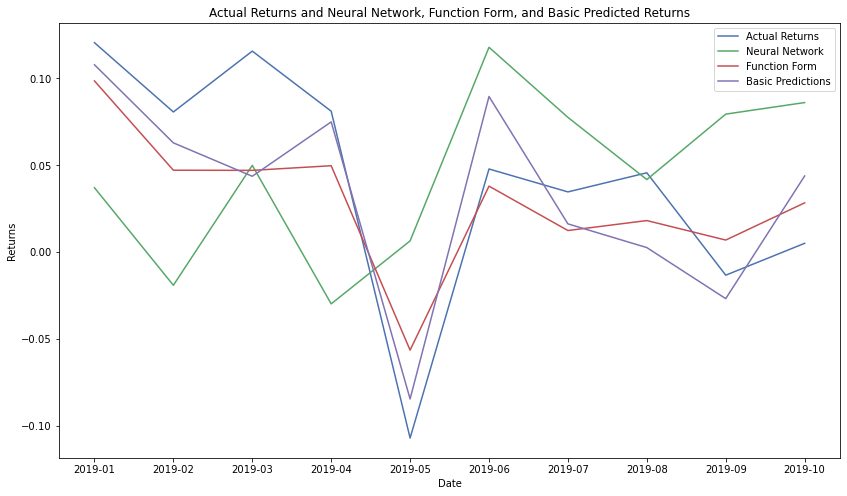

In [37]:
#fig, axs = plt.subplots(2,1, figsize=(15,15))
plt.subplots(figsize=(14,8))
sns.lineplot(data=port_ret_ACT.to_frame().reset_index(), x='Date', y=0, label='Actual Returns').set(ylabel='Returns', title='Actual Returns') 
sns.lineplot(data=port_ret_NN.to_frame().reset_index(), x='Date', y=0, label='Neural Network').set(ylabel='Returns', title='Neural Network Returns') 
sns.lineplot(data=port_ret_FF.to_frame().reset_index(), x='Date', y=0, label='Function Form').set(ylabel='Returns', title='Functional Form Returns') 
sns.lineplot(data=port_ret_PRED.to_frame().reset_index(), x='Date', y=0, label='Basic Predictions').set(ylabel='Returns', title='Actual Returns and Neural Network, Function Form, and Basic Predicted Returns') 
plt.show()
